# DirectLiNGAM

## 準備

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# warningを非表示
warnings.filterwarnings('ignore')

# numpyは小数第3位まで表示
np.set_printoptions(precision=3, suppress=True)

# 乱数を設定
np.random.seed(100)

## テストデータ

In [2]:
# 各変数ごとにデータ生成
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)

# DataFrameとして格納
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

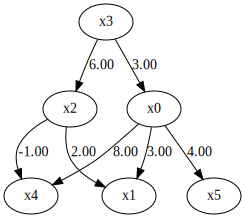

In [3]:
# 線形方程式の係数（因果効果）を行列で表現
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

# グラフの作成
dot = make_dot(m)

# pdf形式で保存
dot.render('DirectLiNGAM_dag')

# png形式で保存
dot.format = 'png'
dot.render('DirectLiNGAM_dag')

# グラフの描写
dot

## 因果探索

In [4]:
# DirectLiNGAMのオブジェクト
model = lingam.DirectLiNGAM()

# 学習
model.fit(X)

In [5]:
# （推定）因果的順序の表示
model.causal_order_

[3, 0, 2, 1, 4, 5]

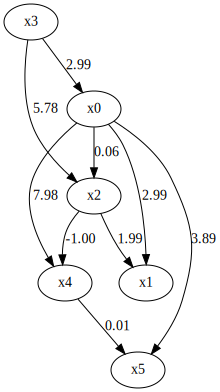

In [6]:
# グラフの作成
dot = make_dot(model.adjacency_matrix_)

# pdf形式で保存
dot.render('DirectLiNGAM_pred_dag')

# png形式で保存
dot.format = 'png'
dot.render('DirectLiNGAM_pred_dag')

# グラフの描写
dot

## 残差間の独立性検定

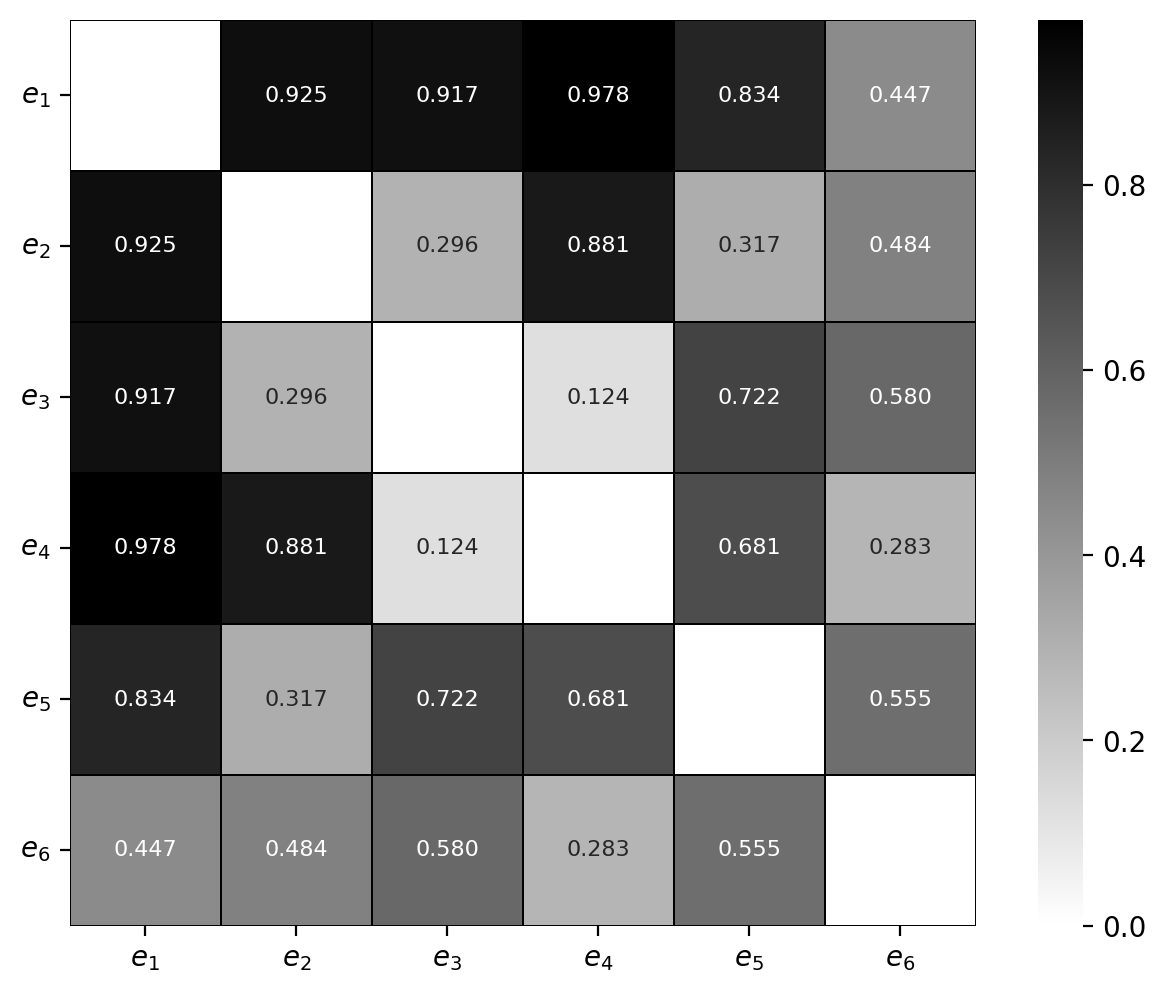

In [7]:
# 変数の合計数を計算（今回は6個）
P = X.shape[1]

# 独立性検定のp値を計算
p_values = model.get_error_independence_p_values(X)

# 対角成分は考慮すべきでないため取り除く
p_values_nan = p_values + np.diag(np.ones(P)*np.nan)

# ヒートマップとして可視化
plt.figure(figsize=[8,6], dpi=200)
sns.heatmap(p_values_nan, square=True, cmap='binary', linewidths=.05, linecolor='k', vmin=np.min(p_values), vmax=np.max(p_values), annot=True, fmt="1.3f", annot_kws={'fontsize':8})
ticks_label = [fr'$e_{{{i+1}}}$' for i in range(P)]
plt.xticks(np.arange(P)+0.5, ticks_label, rotation=0, fontsize=10)
plt.yticks(np.arange(P)+0.5, ticks_label, rotation=0, fontsize=10)
plt.savefig('Pvalues_DirectLiNGAM.png')